In [ ]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("ProductDiscount.csv")

print(df.head())

Mounted at /content/drive
  ProductCategory       Price  Quantity PurchaseDate  Discount
0           Books   25.244412       6.0   23/06/2022     False
1     Electronics  109.657164       3.0   30/10/2021     False
2           Books   87.975397       7.0   09/07/2020     False
3           Books  196.651937       NaN   08/12/2021     False
4     Electronics   31.287391       9.0   24/11/2022     False


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductCategory  1000 non-null   object 
 1   Price            950 non-null    float64
 2   Quantity         900 non-null    float64
 3   PurchaseDate     1000 non-null   object 
 4   Discount         1000 non-null   bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 32.4+ KB


,Price,Quantity
count,950.000000,900.000000
mean,110.964319,4.983333
std,64.812614,2.531394
min,10.880084,1.000000
25%,56.108796,3.000000
50%,111.226986,5.000000
75%,156.474693,7.000000
max,398.064973,9.000000


In [ ]:
df.isnull().sum()
df.head()

,ProductCategory,Price,Quantity,PurchaseDate,Discount
0,Books,25.244412,6.0,23/06/2022,False
1,Electronics,109.657164,3.0,30/10/2021,False
2,Books,87.975397,7.0,09/07/2020,False
3,Books,196.651937,NaN,08/12/2021,False
4,Electronics,31.287391,9.0,24/11/2022,False


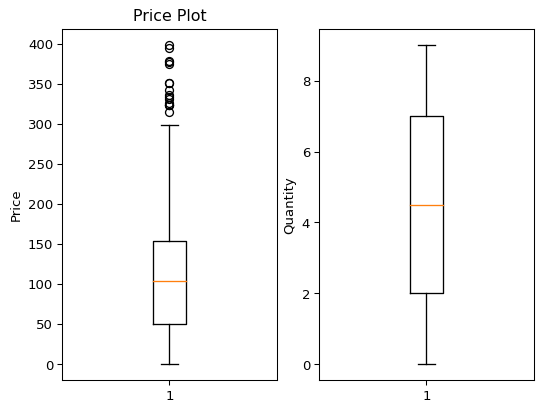

,ProductCategory,Price,Quantity,PurchaseDate,Discount
0,Books,25.244412,6.0,23/06/2022,False
1,Electronics,109.657164,3.0,30/10/2021,False
2,Books,87.975397,7.0,09/07/2020,False
3,Books,196.651937,0.0,08/12/2021,False
4,Electronics,31.287391,9.0,24/11/2022,False


In [ ]:
df['Quantity'] = df['Quantity'].fillna(0)
df['Quantity'].isnull().sum()
df['Price'] = df['Price'].fillna(0)
df['Price'].isnull().sum()
fig,(g1,g2) = plt.subplots(1,2,dpi=95)

#for col in df.columns:
g1.boxplot(df['Price'])
g1.set_ylabel('Price')
g1.set_title('Price Plot')


g2.boxplot(df['Quantity'])
g2.set_ylabel('Quantity')
plt.show()
df.head()

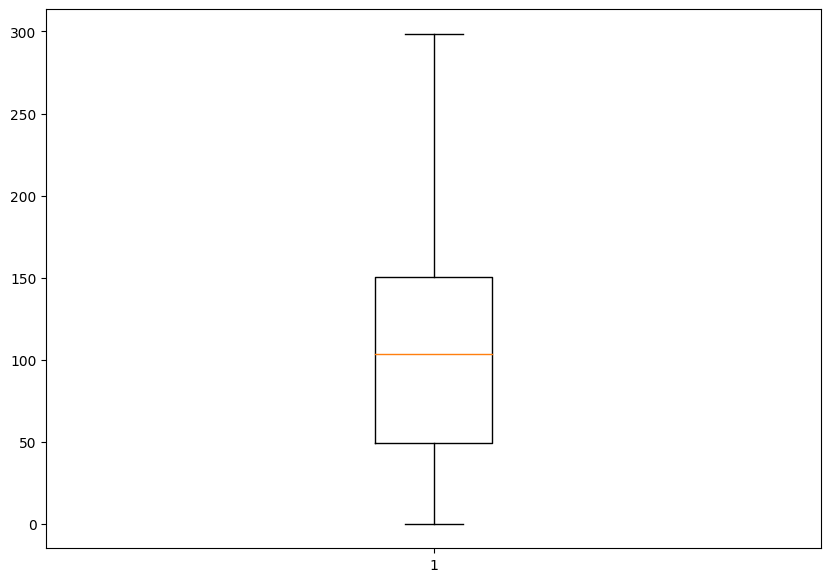

,ProductCategory,Price,Quantity,PurchaseDate,Discount
0,Books,25.244412,6.0,23/06/2022,False
1,Electronics,109.657164,3.0,30/10/2021,False
2,Books,87.975397,7.0,09/07/2020,False
3,Books,196.651937,0.0,08/12/2021,False
4,Electronics,31.287391,9.0,24/11/2022,False


In [ ]:
q1, q3 = np.percentile(df['Price'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)
# Drop the outliers
upper_array = np.where(df['Price'] >= upper)[0]
lower_array = np.where(df['Price'] <= lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
fig = plt.figure(figsize =(10, 7))

plt.boxplot(df['Price'])
plt.show()

df.head()





<ipython-input-7-dd47fb284beb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


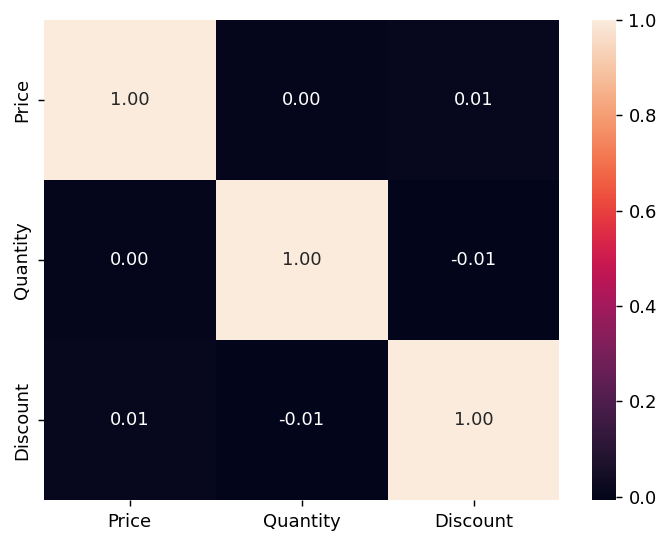

In [ ]:
corr = df.corr()

plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt= '.2f')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

'''l1 = LabelEncoder()
l1.fit(df['ProductCategory'])
df.ProductCategory = l1.transform(df.ProductCategory)'''
from sklearn.preprocessing import OneHotEncoder
df.head()


,ProductCategory,Price,Quantity,PurchaseDate,Discount
0,Books,25.244412,6.0,23/06/2022,False
1,Electronics,109.657164,3.0,30/10/2021,False
2,Books,87.975397,7.0,09/07/2020,False
3,Books,196.651937,0.0,08/12/2021,False
4,Electronics,31.287391,9.0,24/11/2022,False


In [ ]:


df['ProductCategory'] = df['ProductCategory'].astype('category')


# Assigning numerical values and storing it in another columns
df['ProductCategoryNew'] = df['ProductCategory'].cat.codes
col_names=[]
col_names+= [i for i in list(df['ProductCategory'].unique())]
print(col_names)

# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns

enc_data = pd.DataFrame(enc.fit_transform(df[['ProductCategoryNew']]).toarray(),columns=col_names)
#enc_data.columns = enc.get_feature_names_out(['ProductCategory'])


# Merge with main
New_df = df.join(enc_data)
#finaldf=New_df.rename(columns = {'PP':'Price','ProductCategoryNew 0':'C1', '1':'C2', '3':'C3'})


New_df.drop("ProductCategory", axis=1, inplace=True)
New_df.head()
#finaldf.describe()



['Books', 'Electronics', 'Clothing']


,Price,Quantity,PurchaseDate,Discount,ProductCategoryNew,Books,Electronics,Clothing
0,25.244412,6.0,23/06/2022,False,0,1.0,0.0,0.0
1,109.657164,3.0,30/10/2021,False,2,0.0,0.0,1.0
2,87.975397,7.0,09/07/2020,False,0,1.0,0.0,0.0
3,196.651937,0.0,08/12/2021,False,0,1.0,0.0,0.0
4,31.287391,9.0,24/11/2022,False,2,0.0,0.0,1.0


In [ ]:
#New_df.drop("ProductCategoryNew", axis=1, inplace=True)
New_df.head()
#import datetime

New_df['yyyy'] = pd.to_datetime(New_df['PurchaseDate']).dt.year
New_df['mm'] = pd.to_datetime(New_df['PurchaseDate']).dt.month
New_df.drop("PurchaseDate", axis=1, inplace=True)


print(New_df)

          Price  Quantity  Discount  ProductCategoryNew  Books  Electronics  \
0     25.244412       6.0     False                   0    1.0          0.0   
1    109.657164       3.0     False                   2    0.0          0.0   
2     87.975397       7.0     False                   0    1.0          0.0   
3    196.651937       0.0     False                   0    1.0          0.0   
4     31.287391       9.0     False                   2    0.0          0.0   
..          ...       ...       ...                 ...    ...          ...   
995  186.813091       9.0     False                   1    NaN          NaN   
996   32.109616       5.0     False                   1    NaN          NaN   
997  165.315445       1.0     False                   0    NaN          NaN   
998  164.636852       5.0      True                   0    NaN          NaN   
999  176.815121       8.0     False                   2    NaN          NaN   

     Clothing  yyyy  mm  
0         0.0  2022   6  

<ipython-input-10-48ce689bc63e>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  New_df['yyyy'] = pd.to_datetime(New_df['PurchaseDate']).dt.year
<ipython-input-10-48ce689bc63e>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  New_df['mm'] = pd.to_datetime(New_df['PurchaseDate']).dt.month


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

# learning the statistical parameters for each of the data and transforming
rescaledX = scaler.fit_transform(New_df)
rescaledX[:5]
finaldf=pd.DataFrame(rescaledX)
print(finaldf)

            0         1    2    3    4    5    6    7         8
0    0.084547  0.666667  0.0  0.0  1.0  0.0  0.0  1.0  0.454545
1    0.367259  0.333333  0.0  1.0  0.0  0.0  1.0  0.5  0.818182
2    0.294643  0.777778  0.0  0.0  1.0  0.0  0.0  0.0  0.727273
3    0.658617  0.000000  0.0  0.0  1.0  0.0  0.0  0.5  0.636364
4    0.104786  1.000000  0.0  1.0  0.0  0.0  1.0  1.0  0.909091
..        ...       ...  ...  ...  ...  ...  ...  ...       ...
979  0.625666  1.000000  0.0  0.5  NaN  NaN  NaN  0.0  0.090909
980  0.107540  0.555556  0.0  0.5  NaN  NaN  NaN  0.5  0.545455
981  0.553667  0.111111  0.0  0.0  NaN  NaN  NaN  0.0  1.000000
982  0.551394  0.555556  1.0  0.0  NaN  NaN  NaN  0.0  1.000000
983  0.592181  0.888889  0.0  1.0  NaN  NaN  NaN  0.0  0.454545

[984 rows x 9 columns]
